In [7]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from stable_baselines3 import DQN
from environments.discrete_env_v1 import PortfolioManagementEnv

In [9]:
df = pd.read_csv('data/returns_dataset.csv', index_col='Date', parse_dates=['Date'])
ASSET_COLS = ['AXP', 'AAPL', 'BA', 'GS', 'INTC', 'JNJ', 'KO', 'NKE', 'PG', 'DIS']
FEATURE_COLS = []
env = PortfolioManagementEnv(df, ASSET_COLS, FEATURE_COLS, episode_length=-1)

In [10]:
model_dir = 'experiments\discrete_environment\models\DQN_BASELINE_1677597083'
model_version = 920_000
model_path = f'{model_dir}/{model_version}.zip'

In [11]:
model = DQN.load(model_path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


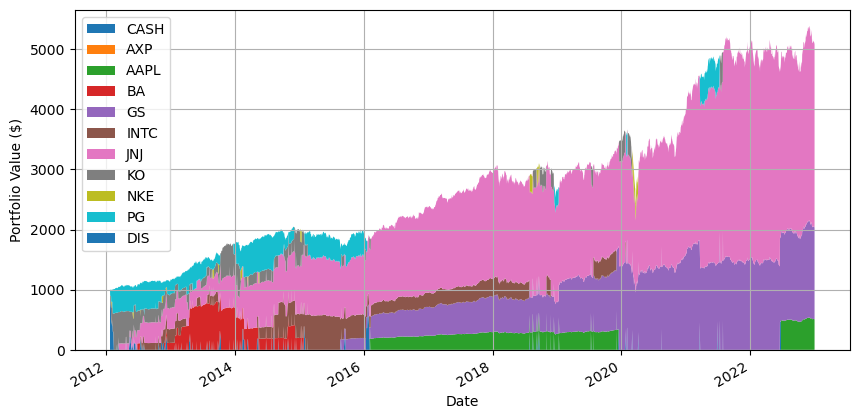

In [35]:
obs, done = env.reset(), False
while not done:
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
env.render()
env.close()

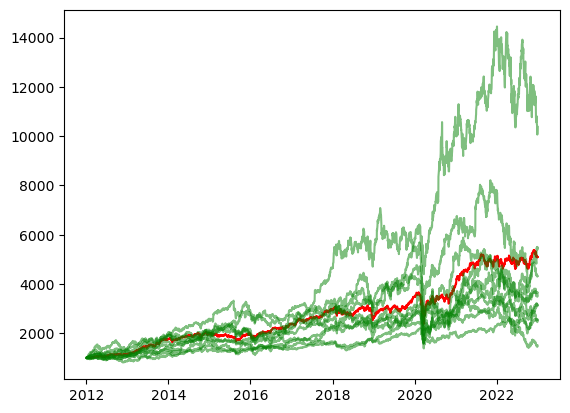

In [36]:
plt.plot(env.INDEX[env.WINDOW_SIZE : len(env.RETURNS)], env.balance_history, color='r');
plt.plot((1+df).cumprod()*1000, color='g', alpha=0.5);